In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/prepared_set_diabets.csv",index_col=0)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0
3,1,89,66,23,28.1,0.167,21,0
4,0,137,40,35,43.1,2.288,33,1
6,3,78,50,32,31.0,0.248,26,1


In [58]:
indexes=df[df.Outcome==0].sample(170).index
df.drop(indexes,inplace=True)

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,3.510242,119.903166,71.469274,29.186220,32.890130,0.501823,31.586592,0.333333
std,3.304281,32.975142,12.302450,10.505807,6.875842,0.343643,10.747286,0.471844
min,0.000000,0.000000,24.000000,7.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,97.000000,64.000000,22.000000,27.800000,0.259000,23.000000,0.000000
50%,2.000000,115.000000,72.000000,29.000000,32.800000,0.415000,28.000000,0.000000
75%,5.000000,141.000000,80.000000,36.000000,36.900000,0.658000,38.000000,1.000000
max,17.000000,199.000000,110.000000,99.000000,67.100000,2.420000,81.000000,1.000000


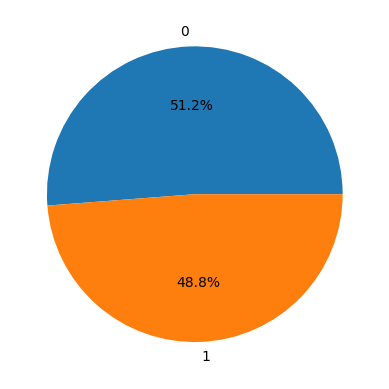

In [59]:
classes=df.Outcome.value_counts().index
plt.pie(df.Outcome.value_counts(),labels=classes,autopct='%1.1f%%')
plt.show()

In [60]:
df.Outcome.value_counts()

0    188
1    179
Name: Outcome, dtype: int64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [61]:
X=df[df.columns[:-1]]
y=df[df.columns[-1]]

In [62]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Xnorm=scaler.fit_transform(X)

In [63]:
from sklearn.model_selection import train_test_split
train_set,test_set,train_setlb,test_setlb=train_test_split(Xnorm,y,test_size=0.2,random_state=25)

In [64]:
from sklearn import metrics

f1_list=[]
for k in range(1,30):
   knn=KNeighborsClassifier(n_neighbors=k)
   knn.fit(train_set,train_setlb)
   pred=knn.predict(test_set)
   ball=metrics.f1_score(test_setlb,pred)
   f1_list.append(ball)


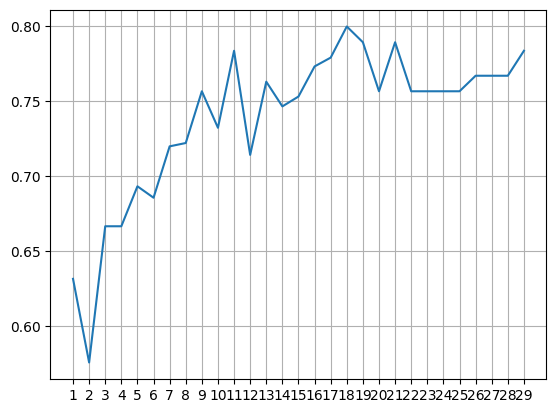

In [65]:
plt.plot(range(1,30),f1_list)
plt.xticks(range(1,30))
plt.grid()
plt.show()

In [31]:
#k=7

In [66]:
from sklearn.model_selection import GridSearchCV
gs_knn=GridSearchCV(KNeighborsClassifier(),{'n_neighbors':range(1,25)},cv=3)
gs_knn.fit(X,y)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 25)})

In [67]:
gs_knn.best_params_

{'n_neighbors': 19}

In [71]:
kmodel=KNeighborsClassifier(n_neighbors=19)
kmodel.fit(train_set,train_setlb)
pred=kmodel.predict(test_set)

print('jaccard=',metrics.jaccard_score(test_setlb,pred))
print('accuracy=',metrics.accuracy_score(test_setlb,pred))
print('\n')

print(metrics.classification_report(test_setlb,pred))

jaccard= 0.6521739130434783
accuracy= 0.7837837837837838


              precision    recall  f1-score   support

           0       0.72      0.85      0.78        33
           1       0.86      0.73      0.79        41

    accuracy                           0.78        74
   macro avg       0.79      0.79      0.78        74
weighted avg       0.80      0.78      0.78        74



              precision    recall  f1-score   support

           0       0.77      0.85      0.81        73
           1       0.59      0.46      0.52        35

    accuracy                           0.72       108
   macro avg       0.68      0.65      0.66       108
weighted avg       0.71      0.72      0.71       108

